In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("C:\\Users\\megha\\Downloads\\features_3_sec.csv")
df2 = pd.read_csv("C:\\Users\\megha\\Downloads\\features_30_sec.csv")
df = pd.concat([df1,df2])

In [3]:
print(df.columns)

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [4]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


<font size="5">preprocesing</font>

In [5]:
df['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [6]:
df['label'] = df['label'].astype('category')
df['class_label'] = df['label'].cat.codes

In [7]:
df_copy = df.copy()

In [8]:
df = df.drop('filename',axis=1)

In [20]:
lookup_genre_name = dict(zip(df.class_label.unique(), df.label.unique()))
lookup_genre_name

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [21]:
df['label'].unique()

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Categories (10, object): ['blues', 'classical', 'country', 'disco', ..., 'metal', 'pop', 'reggae', 'rock']

In [22]:
cols=list(df.columns)
cols.remove('label')
cols.remove('class_label')
#df[cols]


<font size="5">Data splitting for training and testing </font>

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10990 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   length                   10990 non-null  int64   
 1   chroma_stft_mean         10990 non-null  float64 
 2   chroma_stft_var          10990 non-null  float64 
 3   rms_mean                 10990 non-null  float64 
 4   rms_var                  10990 non-null  float64 
 5   spectral_centroid_mean   10990 non-null  float64 
 6   spectral_centroid_var    10990 non-null  float64 
 7   spectral_bandwidth_mean  10990 non-null  float64 
 8   spectral_bandwidth_var   10990 non-null  float64 
 9   rolloff_mean             10990 non-null  float64 
 10  rolloff_var              10990 non-null  float64 
 11  zero_crossing_rate_mean  10990 non-null  float64 
 12  zero_crossing_rate_var   10990 non-null  float64 
 13  harmony_mean             10990 non-null  float64 
 14  harmony_var  

In [24]:
%matplotlib notebook
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X = df.drop(['label','class_label'],axis=1)
y = df['class_label']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [25]:
X

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


<font size="5">Minimum-Maximum Normalization</font>

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#scaling must be applied to the testing set that we computed for training set
X_test_scaled = scaler.transform(X_test)

<font size="5">Feature importance using Random Forests</font>

<script src="https://unpkg.com/I@7.32.1/dist/ipython.js"></script>

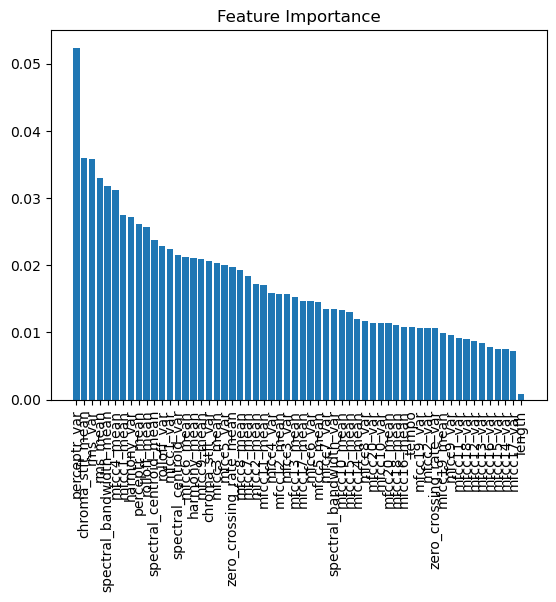

In [16]:
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
clf = RandomForestClassifier(random_state=0, n_jobs=-1).fit(X_train_scaled, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

<font size="5">Feature importance using Decision tree </font>

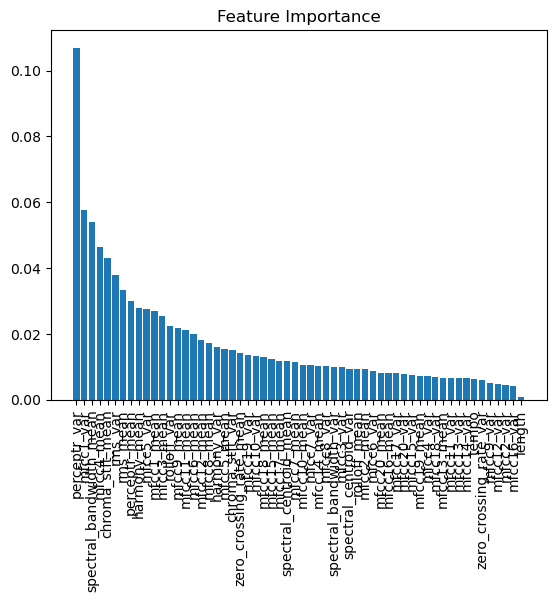

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train_scaled, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

<font size="5">K-Nearest Neighbours </font>

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test) #OR
y_pred=knn.predict(X_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.86863173216885


In [19]:
def predict_genre_by_filename(filename, df_copy, model, scaler):

    # Extract the row matching the filename
    features = df_copy[df_copy['filename'] == filename]
    
    # Check if the file was found
    if features.empty:
        return "File not found in the dataset."
    
    # Drop non-feature columns
    features = features.drop(['filename', 'label', 'class_label'], axis=1)
    
    # Check if the file was found
    if features.empty:
        return "File not found in the dataset."
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Predict and return the genre
    prediction = model.predict(features_scaled)
    predicted_genre = lookup_genre_name[prediction[0]]
    
    return predicted_genre

# Example usage
filename ="blues.00001.wav"
predicted_genre = predict_genre_by_filename(filename, df_copy, clf, scaler)
print(f"The predicted genre is: {predicted_genre}")


The predicted genre is: blues
